### AI Assignment: Yoga-Themed Proof of Concept

#### Objective

#### Develop an AI-powered feature that enhances the yoga experience through personalization, feedback, or innovative functionalities. This proof of concept (PoC) will focus on the use case Pose Detection & Correction.


<b>Use Case: Mood-Based YOGA Session Recommendation
    
<b>Objective:
Create a system that uses sentiment analysis to suggest personalized yoga routines based on a user’s mood. Input can be derived from text enterd by user.
________________________________________

 <b> 1: Problem Understanding & Approach

Problem:

Yoga routines are most effective when aligned with a user’s current emotional state. A system that interprets mood and recommends appropriate sessions can enhance user engagement and well-being.

Approach:

•	Use text input to determine the user’s mood.

•	Map moods (e.g., stressed, happy, tired) to yoga routines designed to address those states.

•	Suggest routines with additional mindfulness or breathing exercises to complement the physical practice.
________________________________________


 <b>2: Data Selection

Datasets:

 1.Emotion Detection Dataset 

    - tweet_emotions_1.csv: Text-based sentiment classification.


 2.Yoga Routine Dataset :

    - final_asan1_1: yoga dataset and customised it by mapping moods depending upon yoga benefits.

________________________________________

<b> 3: Model Development

1.Preprocess dat

2.Train a emotion detection model.

3.Implement a recommendation engine to suggest sessions based on detected mood.


________________________________________

<b>4: Integration with a Yoga App (Optional)

Simulated Interface:

1. Build a simple web app using Flask:

2. Text input: Users can type how they feel (e.g., “I feel stressed”).

3. Output: Recommended yoga session with a short description and Benefits

_______________________________________

## Step 1: Install Required Libraries

In [157]:
pip install librosa tensorflow scikit-learn transformers pandas matplotlib librosa


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Required Libraries

In [158]:
import os
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import PorterStemmer , WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from tensorflow.keras import Sequential

## Step 3: Load the emotion related dataset available on kaggle

In [159]:
def load_text_data(file_path):
    data = pd.read_csv(file_path)
    data = data[['sentiment', 'content']]  # Keep only the relevant columns
    return data

# Load the dataset (replace the path with your dataset's path)
data_file = r"C:\ML and AI\jobs\revoltronX\tweet_emotions_1.csv"   # Replace with the actual path to the dataset
text_data = load_text_data(data_file)

# Show a preview of the dataset
print(text_data.head())


    sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...


In [160]:
# Rename columns as per our use case
text_data.rename(columns={'sentiment': 'emotion', 'content': 'text'}, inplace=True)

In [161]:
text_data.head()

,emotion,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [162]:
text_data.shape

(40000, 2)

In [163]:
text_data.describe()

,emotion,text
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


In [164]:
text_data.emotion.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [165]:
text_data.emotion.value_counts(ascending = True)

emotion
anger          110
boredom        179
enthusiasm     759
empty          827
hate          1323
relief        1526
fun           1776
surprise      2187
love          3842
sadness       5165
happiness     5209
worry         8459
neutral       8638
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='emotion'>

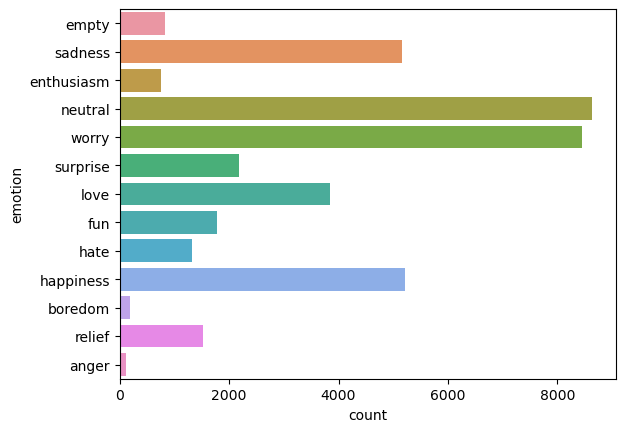

In [166]:
sns.countplot(y=text_data.emotion)

In [168]:
text_data.shape

(40000, 2)

In [170]:
text_data.isnull().sum()

emotion    0
text       0
dtype: int64

- Null values are not present in the dataset

In [171]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dalmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dalmi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dalmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:

nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dalmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [173]:
text_data.head()

,emotion,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


### Preprocessing the data

In [174]:
## preprocessing text

def process_Text(text):
    lemmatizer = WordNetLemmatizer()
    
    # Remove user mentions, URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # Remove mentions (e.g., @username)
    text = re.sub(r'http\S+', '', text)             # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)# Remove special characters, keep only alphanumeric characters
 
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Remove stop words and perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)   # Join the processed words back into a single string

In [175]:
text_data["processed_Text"] = text_data["text"].apply(process_Text)

In [176]:
text_data["processed_Text"]

0        know listenin bad habit earlier started freaki...
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39995                                                     
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: processed_Text, Length: 40000, dtype: object

In [177]:
text_data["processed_Text"][1]

'layin n bed headache ughhhh waitin call'

In [178]:
text_data.head()

,emotion,text,processed_Text
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one


In [179]:
from gensim.models import Word2Vec
# Preparing data for Word2Vec
w2v_data = [text.split() for text in text_data['processed_Text']]

# Training the Word2Vec model
w2v_model = Word2Vec(w2v_data, vector_size=150, window=10, min_count=2, workers=4)

In [180]:

def text_to_vector(text):
    words = text.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv.key_to_index]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)


# Converting All Texts to Vectors
vectorized_texts = np.array([text_to_vector(text) for text in text_data['processed_Text']])

In [181]:
import imblearn
from imblearn.over_sampling import RandomOverSampler


#Initialization and Application of RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(vectorized_texts, text_data['emotion'])

In [182]:
# Save Word2Vec model
w2v_model.save("word2vec_model.bin")
print("Word2Vec model saved.")

# Save stop words (assuming it's a set or list)
joblib.dump(stop_words, "stop_words.pkl")
print("Stop words saved.")


Word2Vec model saved.
Stop words saved.


### STEP 4 : Model Building

In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


### Spliting data into train and test set

In [184]:
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

 ### Function for Accuracy,F1 Score and Classification report

In [185]:
def ouput_result(y_pred):
  print('Accuracy:', accuracy_score(y_test, y_pred))
  print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
  print('Classification Report:\n', classification_report(y_test, y_pred))

 ### Model 1 : Logistic Regression Model

In [186]:


# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
ouput_result(y_pred)

C:\Users\dalmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.16109354824346586
F1 Score: 0.1458087361840202
Classification Report:
               precision    recall  f1-score   support

       anger       0.12      0.21      0.15      1745
     boredom       0.19      0.34      0.25      1758
       empty       0.09      0.05      0.06      1728
  enthusiasm       0.17      0.13      0.15      1735
         fun       0.13      0.10      0.11      1751
   happiness       0.19      0.12      0.14      1747
        hate       0.17      0.28      0.21      1741
        love       0.28      0.41      0.33      1662
     neutral       0.11      0.02      0.04      1699
      relief       0.15      0.15      0.15      1735
     sadness       0.15      0.07      0.10      1711
    surprise       0.12      0.16      0.14      1718
       worry       0.12      0.06      0.08      1729

    accuracy                           0.16     22459
   macro avg       0.15      0.16      0.15     22459
weighted avg       0.15      0.16      0.15     224

#### Observation :
- The results indicate poor model performance, with an overall accuracy of 16% and low F1-scores across all classes. 
- The model struggles to distinguish between emotions, as evidenced by the low precision, recall, and F1-scores, suggesting that the features or data preprocessing might need improvement.

### Model 2: Naive Bayes Model

In [188]:
# Naive Bayes Classifier with hyperparameter optimization
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Логарифмическое пространство между 1 и 1e-9
}

# # GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=3, scoring='f1_weighted', n_jobs=8)
grid_search.fit(X_train, y_train)

# # Best model and its evaluation
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)
ouput_result(y_pred)

Accuracy: 0.12373658666904136
F1 Score: 0.09844863175003975
Classification Report:
               precision    recall  f1-score   support

       anger       0.10      0.22      0.14      1745
     boredom       0.13      0.53      0.20      1758
       empty       0.20      0.10      0.13      1728
  enthusiasm       0.13      0.02      0.04      1735
         fun       0.10      0.02      0.04      1751
   happiness       0.17      0.05      0.08      1747
        hate       0.09      0.20      0.12      1741
        love       0.22      0.23      0.23      1662
     neutral       0.09      0.02      0.03      1699
      relief       0.13      0.10      0.11      1735
     sadness       0.09      0.04      0.05      1711
    surprise       0.10      0.04      0.06      1718
       worry       0.11      0.03      0.05      1729

    accuracy                           0.12     22459
   macro avg       0.13      0.12      0.10     22459
weighted avg       0.13      0.12      0.10     22

#### Observation :

- The results show very poor performance for the logistic regression model, with an accuracy of 12% and F1-scores below 0.25 for all classes. 

- The model has significant difficulty distinguishing between emotions, as reflected in low precision, recall, and F1-scores, suggesting either inadequate features, poor data quality, or an unsuitable algorithm for the task.

### Model 3 : AdaBoost with hyperparameter optimization

In [189]:
# AdaBoost with hyperparameter optimization
param_grid = {'n_estimators': [25, 100], 'learning_rate': [0.01, 0.1, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='f1_weighted', n_jobs=8)
grid_search.fit(X_train, y_train)

# model evaluation
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
ouput_result(y_pred)

C:\Users\dalmi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.1690191014737967
F1 Score: 0.15352485321552173
Classification Report:
               precision    recall  f1-score   support

       anger       0.28      0.29      0.28      1745
     boredom       0.23      0.46      0.31      1758
       empty       0.11      0.10      0.10      1728
  enthusiasm       0.16      0.11      0.13      1735
         fun       0.17      0.09      0.12      1751
   happiness       0.15      0.12      0.13      1747
        hate       0.13      0.22      0.16      1741
        love       0.20      0.34      0.25      1662
     neutral       0.14      0.14      0.14      1699
      relief       0.14      0.17      0.15      1735
     sadness       0.10      0.04      0.06      1711
    surprise       0.12      0.07      0.09      1718
       worry       0.13      0.04      0.06      1729

    accuracy                           0.17     22459
   macro avg       0.16      0.17      0.15     22459
weighted avg       0.16      0.17      0.15     224

#### Observation :
- The AdaBoost model shows slightly better performance than logistic regression, achieving an accuracy of 17% and slightly higher F1-scores for certain classes like boredom and love. 
- However, the overall performance remains poor, indicating challenges in effectively capturing emotion features. 
- This suggests a need for feature engineering or trying alternative algorithms better suited to the dataset.

### Model 4:Decision Tree model

In [190]:
# Hyperparameter Optimization for Decision Tree
dt_params = {'max_depth': [10, 60]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='f1_weighted')
dt_model.fit(X_train, y_train)

# model evaluation
y_pred = dt_model.predict(X_test)
ouput_result(y_pred)

Accuracy: 0.7974531368271072
F1 Score: 0.7764932960785623
Classification Report:
               precision    recall  f1-score   support

       anger       0.99      0.98      0.98      1745
     boredom       0.98      1.00      0.99      1758
       empty       0.83      0.99      0.90      1728
  enthusiasm       0.90      0.99      0.94      1735
         fun       0.84      0.96      0.90      1751
   happiness       0.67      0.63      0.65      1747
        hate       0.89      0.99      0.94      1741
        love       0.76      0.83      0.79      1662
     neutral       0.36      0.20      0.26      1699
      relief       0.84      0.97      0.90      1735
     sadness       0.66      0.65      0.65      1711
    surprise       0.82      0.92      0.87      1718
       worry       0.40      0.23      0.29      1729

    accuracy                           0.80     22459
   macro avg       0.77      0.80      0.78     22459
weighted avg       0.77      0.80      0.78     2245

#### Observation:
- The Decision Tree model with hyperparameter tuning demonstrates a significant improvement, achieving an accuracy of 79.7% and an F1 score of 77.6%. 
- Precision and recall are high for several emotion classes like anger, boredom, and enthusiasm, indicating the model effectively distinguishes these. However, performance for classes like neutral and worry remains low, suggesting these categories are harder to differentiate and may require better feature engineering or data balancing. 
- This model provides a strong baseline for further refinement.

### Model 5:KNN with Hyperparameter Optimization

In [191]:
#import time
#%time
# Hyperparameter Optimization for KNN
knn_params = {'n_neighbors': [2, 50]}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=2, scoring='f1_weighted')
knn_model.fit(X_train, y_train)

# model evaluation
y_pred = knn_model.predict(X_test)
ouput_result(y_pred)

C:\Users\dalmi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dalmi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\dalmi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dalmi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\dalmi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Accuracy: 0.749231933745937
F1 Score: 0.717110887204636
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      1.00      0.94      1745
     boredom       0.97      1.00      0.98      1758
       empty       0.85      0.94      0.89      1728
  enthusiasm       0.87      0.99      0.93      1735
         fun       0.76      0.96      0.85      1751
   happiness       0.52      0.65      0.58      1747
        hate       0.83      0.98      0.90      1741
        love       0.68      0.72      0.70      1662
     neutral       0.30      0.21      0.25      1699
      relief       0.81      0.92      0.86      1735
     sadness       0.56      0.43      0.49      1711
    surprise       0.79      0.83      0.81      1718
       worry       0.45      0.07      0.12      1729

    accuracy                           0.75     22459
   macro avg       0.71      0.75      0.72     22459
weighted avg       0.71      0.75      0.72     22459


#### Observation:
- The K-Nearest Neighbors (KNN) model with hyperparameter optimization achieves an accuracy of 74.9% and an F1 score of 71.7%. 
- It performs exceptionally well for classes like anger, boredom, and enthusiasm, with high precision and recall. 
- However, it struggles with classes like neutral, worry, and sadness, which exhibit low recall and F1 scores, indicating difficulty in identifying these emotions. 
- This model performs reasonably well overall but may require additional feature refinement or alternate distance metrics to improve results for underperforming classes.

### Model 6: Random Forest with Hyperparameter Optimization

In [192]:
# Hyperparameter Optimization for RandomForest
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='f1_weighted')


In [193]:
rf_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             scoring='f1_weighted')

In [194]:
# model evaluation
y_pred = rf_model.predict(X_test)
ouput_result(y_pred)

Accuracy: 0.8162429315641836
F1 Score: 0.803675178038691
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.98      0.99      1745
     boredom       0.99      1.00      1.00      1758
       empty       0.88      0.99      0.93      1728
  enthusiasm       0.94      0.99      0.97      1735
         fun       0.89      0.96      0.92      1751
   happiness       0.71      0.67      0.69      1747
        hate       0.89      0.99      0.94      1741
        love       0.79      0.85      0.82      1662
     neutral       0.42      0.28      0.34      1699
      relief       0.89      0.97      0.93      1735
     sadness       0.66      0.67      0.67      1711
    surprise       0.85      0.92      0.89      1718
       worry       0.42      0.33      0.37      1729

    accuracy                           0.82     22459
   macro avg       0.80      0.82      0.80     22459
weighted avg       0.80      0.82      0.80     22459

#### Observation:
- The Random Forest model with hyperparameter optimization achieves an accuracy of 81.6% and an F1 score of 80.3%, showing strong overall performance. 
- It handles classes like anger, boredom, enthusiasm, and fun particularly well, with near-perfect precision, recall, and F1 scores. H
- it struggles with neutral and worry, exhibiting lower recall and F1 scores, indicating challenges in distinguishing these emotions. 
- The model demonstrates high reliability across most classes, making it a robust choice for emotion detection with room for improvement in nuanced categories like neutral and worry.

#### <U>Final Model Selection:

Based on the results from the various models, here's an overview of the key points:

<b>1) Logistic Regression:
        Accuracy: 0.12–0.16, 
        
        F1 Score: 0.10–0.15

        Performance: This model shows the lowest accuracy and F1 scores, indicating it's not effective at capturing the emotions in the dataset.

    - Recommendation: Not suitable for the task.
    
<b>2) Naive Bayes:

    Accuracy: 0.12, 
    F1 Score: 0.10

    Performance: The model shows poor accuracy and F1 scores across most emotional categories. Its recall for some emotions like boredom is better, but the overall performance is quite weak.

    Recommendation: Not suitable for the task due to its low performance across most emotions.

<b>3) AdaBoost:

    Accuracy: 0.17, 
    
    F1 Score: 0.15
    
    Performance: While it slightly outperforms logistic regression, it still has low accuracy and recall for many emotional categories.

    - Recommendation: Still not an ideal choice.

<b>4) Decision Tree:

    Accuracy: 0.80, 
    
    F1 Score: 0.78

    Performance: Shows good overall results, especially with emotions like anger and boredom. However, it struggles with categories like neutral and worry.

    - Recommendation: A strong contender, with balanced performance.

<b>5) KNN (K-Nearest Neighbors):

    Accuracy: 0.75, 
    
    F1 Score: 0.72

    Performance: Performs reasonably well, but has lower scores for emotions like worry, neutral, and sadness.

    - Recommendation: A decent model but not the best option.

<b>6) Random Forest:
    
    Accuracy: 0.82, 
    F1 Score: 0.80

    Performance: Delivers excellent overall results with high accuracy and F1 scores. It performs well across most emotions, though there is room for improvement in categories like neutral and worry.

    Recommendation: The best choice among the models, providing the best balance of performance and generalization.

#### Conclusion:
    
<b>Random Forest stands out as the most effective model for emotion detection, offering the highest accuracy, F1 score, and strong performance across most categories.

In [195]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'emotion_rf_model.pkl')
print("Model saved as 'emotion_rf_model.pkl'")

Model saved as 'emotion_rf_model.pkl'


## Using the final choosen model i.e Random forest for user mood detection from text

In [196]:
# Load the saved model
loaded_model = joblib.load('emotion_rf_model.pkl')
print("Model loaded successfully.")

# Example text input
text_input = ["I am feeling so happy today!"]

Model loaded successfully.


In [232]:
import re
import numpy as np
from gensim.models import Word2Vec
import joblib
from nltk.stem import WordNetLemmatizer

# Load necessary components
w2v_model = Word2Vec.load("word2vec_model.bin")
stop_words = joblib.load("stop_words.pkl")
lemmatizer = WordNetLemmatizer()

# Define preprocessing function (same as training)
def process_Text(text):
    # Remove user mentions, URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # Remove mentions (e.g., @username)
    text = re.sub(r'http\S+', '', text)             # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)       # Remove special characters, keep only alphanumeric characters
    
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Remove stop words and perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Convert processed text to vector
def text_to_vector(text):
    words = text.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv.key_to_index]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)

# Prediction function
def predict_emotion(input_text, model_path="emotion_rf_model.pkl"):
    # Load the trained RandomForest model
    model = joblib.load(model_path)
    
    # Preprocess the input text
    processed_text = process_Text(input_text)
    vectorized_input = text_to_vector(processed_text)
    
    # Predict emotion
    predicted_emotion = model.predict([vectorized_input])
    return predicted_emotion[0]

# Example usage
input_text = "i am excited!"
predicted_emotion = predict_emotion(input_text)
print(f"Predicted Emotion: {predicted_emotion}")


Predicted Emotion: fun


## YOGA recommendation

In [199]:
# Load the dataset I have  used final_asan1_1 dataset available online

yoga_file = r"C:\ML and AI\jobs\revoltronX\final_asan1_1.csv"   # Replace with the actual path to the dataset
yoga_data = pd.read_csv(yoga_file)

# Show a preview of the dataset
yoga_data.head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
0,1,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,NaN,NaN,NaN,NaN,Beginners
1,2,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",NaN,NaN,NaN,NaN,Beginners
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners
3,4,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,NaN,NaN,NaN,NaN,Beginners
4,5,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,NaN,NaN,NaN,NaN,Beginners


### Processing yoga dataset

In [200]:
yoga_data.describe()

,AID,You tube Vdo link,Photo,References
count,226.000000,0.0,0.0,0.0
mean,113.500000,NaN,NaN,NaN
std,65.384759,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,57.250000,NaN,NaN,NaN
50%,113.500000,NaN,NaN,NaN
75%,169.750000,NaN,NaN,NaN
max,226.000000,NaN,NaN,NaN


In [201]:
yoga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AID                226 non-null    int64  
 1   AName              226 non-null    object 
 2   Description        225 non-null    object 
 3   Benefits           215 non-null    object 
 4   Contraindications  158 non-null    object 
 5   Breathing          188 non-null    object 
 6   awareness          186 non-null    object 
 7   You tube Vdo link  0 non-null      float64
 8   Photo              0 non-null      float64
 9   References         0 non-null      float64
 10  Variations         51 non-null     object 
 11  Level              177 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 21.3+ KB


In [202]:
yoga_data.AID

0        1
1        2
2        3
3        4
4        5
      ... 
221    222
222    223
223    224
224    225
225    226
Name: AID, Length: 226, dtype: int64

In [203]:
yoga_data.AName

0         Padanguli Naman
1             Goolf Naman
2            Goolf Chakra
3           Goolf Ghooman
4      Janufalak Akarshan
              ...        
221          MOOLA BANDHA
222       UDDIYANA BANDHA
223           MAHA BANDHA
224             JALA NETI
225            SUTRA NETI
Name: AName, Length: 226, dtype: object

In [204]:
yoga_data.AName.unique()

array(['Padanguli Naman', 'Goolf Naman', 'Goolf Chakra', 'Goolf Ghooman',
       'Janufalak Akarshan', 'Janu Naman', 'Janu Chakra',
       'Ardha Titali Asana', 'Shroni Chakra', 'Pooma Titali Asana',
       'Mushtika Bandhana', 'Manibandha Naman', 'Manibandha Chakra',
       'Kehuni Naman', 'Kehuni Chakra', 'Skandha Chakra',
       'Greeva Sanchalana', 'Padotthanasana', 'Padachakrasana',
       'Pada Sanchalanasana', 'Supta Pawanmuktasana',
       'Jhulana Lurhakanasana', 'Supta Udarakarshanasana',
       'Shava Udarakarshanasana', 'Naukasana', 'Rajju Karshanasana',
       'Gatyatmak Meru Vakrasana', 'Chakki Chalanasana',
       'Nauka Sanchalanasana', 'Kashtha Takshanasana', 'Namaskarasana',
       'Vayu Nishkasana', 'Kauva Chalasana', 'Udarakarshanasana',
       'Palming (Eye Exercise)', 'Blinking (Eye Exercise) ',
       'Sideways Viewing (Eye Exercise)',
       'Front and Sideways Viewing (Eye Exercise)',
       'Up and Down Viewing (Eye Exercise)',
       'Rotational Viewing (Eye 

In [205]:
yoga_data[yoga_data.Description.isnull()]

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
163,164,Pooma Dhanurasana (full bow pose),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced


In [206]:
yoga_data[yoga_data.Benefits.isnull()]

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
85,86,HASTA UTTHANASANA,"Seperate the hands, raise and stretch both arm...",NaN,NaN,Inhale while raising the arms.,Physical - on the stretch of the abdomen and e...,NaN,NaN,NaN,NaN,Beginners
86,87,PADAHASTASANA,Bend fotward from the hips until the fingers o...,NaN,People with back conditions should not bend fo...,Exhale while bending fotward. Contract the abd...,Physical - on the back and pelvic region. Spir...,NaN,NaN,NaN,NaN,Beginners
87,88,ASHWA SANCHALANASANA,Place the hands on the floor beside the feet. ...,NaN,The full su·etch is not advised for people wit...,: Inhale while stretching the right leg back,Physical - on the stretch from the thigh throu...,NaN,NaN,NaN,NaN,Beginners
90,91,Bhujangasana (cobra pose),Keep the hands and feet in place.\nSlide the c...,NaN,Not advised for people suffering from peptic u...,Inhale while raising the torso and arching the...,Physical - on relaxation of the spine. Spiritu...,NaN,NaN,NaN,NaN,Beginners
123,124,Bhumi Pada Mastakasana (half headstand),Assume matjari-asana.\nTum the toes under.\nPl...,NaN,NaN,Normal breathing.,Physical - on the sensation at the crown of th...,NaN,NaN,NaN,NaN,Intermediate
124,125,Vipareeta Karani Asana (inverted pose),Lie flat on the back with the legs and feet to...,NaN,NaN,Inhale while in the lying position.Retain the ...,NaN,NaN,NaN,NaN,NaN,Intermediate
154,155,Eka Pada Baka Dhyanasana (one-legged crane pose),Assume the final position of baka dhyanasana. ...,NaN,NaN,Retain the breath inside in the final position...,NaN,NaN,NaN,NaN,NaN,Intermediate
163,164,Pooma Dhanurasana (full bow pose),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced
174,175,Padma Mayurasana (lotus or bound peacock pose),Sit in padmasana. Stand on the knees and place...,NaN,": As for 1nayurasana. In addition, those with ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,Dwi Pada Sirasana (two feet to head pose),Perform eka pada sirasana and relax. Stage 2 S...,NaN,NaN,Exhale while placing the second foot behind th...,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
#keeping only required columns
yoga_data1=yoga_data[['AName','Description','Benefits','Contraindications','Breathing','awareness']]

In [208]:
yoga_data1

,AName,Description,Benefits,Contraindications,Breathing,awareness
0,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...
1,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le..."
2,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.
3,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.
4,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.
...,...,...,...,...,...,...
221,MOOLA BANDHA,Close the eyes and relax the whole body for a ...,"Moola bandha bestows many physical, mental and...",This practice should only be performed\nunder ...,The above practice may also be performed with\...,Physical - at the point of perineal contractio...
222,UDDIYANA BANDHA,Sit in siddha/siddha yoni asana or padmasana w...,Uddiyana bandha is a panacea for the abdomen. ...,"Persons suffering from colitis, stomach\nor in...",Uddiyana bandha is performed with external\nbr...,Physical - on the abdomen and breath.\nSpiritu...
223,MAHA BANDHA,Sit in siddha/siddha yoni asana or padmasana w...,Maha bandha gives enhanced benefits of all thr...,People suffering from high or low blood\npress...,NaN,"Physical - on the perineal, abdominal and thro..."
224,JALA NETI,"A special neti lota, 'neti pof should be used....",J ala neti removes mucus and pollution from th...,People who suffer from chronic bleeding in\nth...,NaN,Physical - on relaxing and positioning the bod...


In [209]:
yoga_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AName              226 non-null    object
 1   Description        225 non-null    object
 2   Benefits           215 non-null    object
 3   Contraindications  158 non-null    object
 4   Breathing          188 non-null    object
 5   awareness          186 non-null    object
dtypes: object(6)
memory usage: 10.7+ KB


In [210]:
yoga_data1 = yoga_data1.dropna(subset=['Benefits'])

In [211]:
yoga_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 225
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AName              215 non-null    object
 1   Description        215 non-null    object
 2   Benefits           215 non-null    object
 3   Contraindications  153 non-null    object
 4   Breathing          180 non-null    object
 5   awareness          180 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [212]:
# Replace null values with empty strings in the relevant columns
yoga_data1['Contraindications'] = yoga_data1['Contraindications'].fillna("")
yoga_data1['Breathing'] = yoga_data1['Breathing'].fillna("")
yoga_data1['awareness'] = yoga_data1['awareness'].fillna("")



C:\Users\dalmi\AppData\Local\Temp\ipykernel_5776\3007518724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoga_data1['Contraindications'] = yoga_data1['Contraindications'].fillna("")
C:\Users\dalmi\AppData\Local\Temp\ipykernel_5776\3007518724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoga_data1['Breathing'] = yoga_data1['Breathing'].fillna("")
C:\Users\dalmi\AppData\Local\Temp\ipykernel_5776\3007518724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [213]:
# Merge the columns into one with a meaningful column name
yoga_data1['Precautions_and_Awareness'] = (
    "Contraindications: " + yoga_data1['Contraindications'] + "\n" +
    "Breathing: " + yoga_data1['Breathing'] + "\n" +
    "Awareness: " + yoga_data1['awareness']
)




C:\Users\dalmi\AppData\Local\Temp\ipykernel_5776\1506884769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoga_data1['Precautions_and_Awareness'] = (


In [214]:
yoga_data1.head()

,AName,Description,Benefits,Contraindications,Breathing,awareness,Precautions_and_Awareness
0,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,Contraindications: \nBreathing: Inhale as the ...
1,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",Contraindications: \nBreathing: Inhale as the ...
2,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,Contraindications: \nBreathing: Inhale on the ...
3,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,Contraindications: \nBreathing: Inhale on the ...
4,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,Contraindications: \nBreathing: Inhale while c...


#### Keeping only required columns

In [215]:
# Drop the original columns if you no longer need them
yoga_data1 = yoga_data1.drop(columns=['Contraindications', 'Breathing', 'awareness'])


In [216]:

# Display the updated DataFrame
yoga_data1.head()

,AName,Description,Benefits,Precautions_and_Awareness
0,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale as the ...
1,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale as the ...
2,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale on the ...
3,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,Contraindications: \nBreathing: Inhale on the ...
4,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale while c...


In [217]:
print(yoga_data1.Benefits.head(10))

0    This group of asanas is concerned with looseni...
1    This group of asanas is concerned with looseni...
2    This group of asanas is concerned with looseni...
3    All the foot and calf asanas help in returning...
4    This group of asanas is concerned with looseni...
5    This group of asanas is concerned with looseni...
6    Since the knee joint bears the whole weight of...
7    This is an excellent preparatory practice for ...
8    This group of asanas is concerned with looseni...
9    Both stages prepare the legs for mastery of\np...
Name: Benefits, dtype: object


#### Mapping emotion to keywords

In [218]:
# Define emotion keywords for mapping based on yoga benefits
emotion_keywords = {
    'sadness': ['sad', 'depressed', 'unhappy', 'cry', 'tears', 'sorrow'],
    'enthusiasm': ['excited', 'energetic', 'alert', 'active', 'exciting'],
    'worry': ['worry', 'anxiety', 'nervous', 'tension', 'stress', 'uneasy'],
    'love': ['love', 'affection', 'heart', 'care', 'compassion'],
    'hate': ['hate', 'anger', 'rage', 'frustration', 'irritated'],
    'fun': ['fun', 'playful', 'jovial', 'silly', 'joy'],
    'happiness': ['happy', 'content', 'joy', 'grateful', 'blessed'],
    'calm': ['calm', 'peaceful', 'relax', 'serene', 'relieved'],
    'surprise': ['surprised', 'astonished', 'amazed', 'shocked', 'unexpected'],
    'anger': ['angry', 'rage', 'furious', 'irritated', 'enraged'],
    'boredom': ['bored', 'dull', 'uninterested', 'tired', 'apathetic']
}


In [219]:
# Function to detect emotion from benefit text
def detect_emotion_from_benefit(benefit_text):
    # Convert to lowercase for case-insensitive matching
    benefit_text = benefit_text.lower()
    
    # Check for each emotion keyword in the benefit text
    for emotion, keywords in emotion_keywords.items():
        if any(keyword in benefit_text for keyword in keywords):
            return emotion
    
    # Default return if no emotion is found
    return 'neutral'

In [220]:
# Apply emotion detection to the 'Benefits' column of the yoga_data1 DataFrame
yoga_data1['emotion'] = yoga_data1['Benefits'].apply(detect_emotion_from_benefit)

In [221]:
# Set the maximum column width to a higher value (e.g., 1000 characters)
pd.set_option('display.max_colwidth', 500)

# Display the updated DataFrame with the new 'emotion' column
yoga_data1[['Benefits', 'emotion']].head(30)  # Print first few rows to verify

,Benefits,emotion
0,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
1,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
2,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
3,"All the foot and calf asanas help in returning the\nstagnant lymph and venous blood. They thus relieve\ntiredness and cramp, and help prevent venous thrombosis,\nespecially in bedridden, post-operative patients.",boredom
4,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
5,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
6,"Since the knee joint bears the whole weight of the\nbody and has no strong muscles for support, it is most\nvulnerable to injuries, sprains and osteoarthritis. All the\nknee asanas strengthen the quadriceps muscle and the\nligaments around the knee joint. These asanas rejuvenate\nthe joint by activating the healing energies.",neutral
7,"This is an excellent preparatory practice for loos-\nening up the knee and hip joints for meditative poses.\n\nThose people who cannot sit con1fortably in cross-legged\npositions should practise ardha titali asana daily, both\nmorning and evening.",neutral
8,"This group of asanas is concerned with loosening up the joints\nof the body. It is excellent for those debilitated by rheumatism,\n\narthritis, high blood pressure, heart problems or other ail-\nments where vigorous physical exercise is not advised. It is\n\nparticularly useful for eliminating energy blockages in the\njoints of the physical body, and for improving coordination,\nself-awareness and self-confidence.",love
9,Both stages prepare the legs for mastery of\npadmasana and other meditative asanas. The inner thigh\nmuscles hold a lot of tension which is relieved by these\nasanas. They also remove tiredness due to long hours of\nstanding and walking.,worry


In [222]:
pd.set_option('display.max_colwidth', 50)
yoga_data1.head()

,AName,Description,Benefits,Precautions_and_Awareness,emotion
0,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale as the ...,love
1,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale as the ...,love
2,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale on the ...,love
3,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,Contraindications: \nBreathing: Inhale on the ...,boredom
4,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,Contraindications: \nBreathing: Inhale while c...,love


In [223]:
yoga_data1.emotion.unique()

array(['love', 'boredom', 'neutral', 'worry', 'calm', 'hate', 'fun',
       'enthusiasm'], dtype=object)

### Saving our processed dataframe to csv file for further use 

In [231]:
yoga_data1.to_csv("emotion_final_1.csv", index=False)

In [224]:
!pip install termcolor

## Recommending Top 3 Yoga Aasans as per predicted emotion by model

In [225]:
##Recommending yoga as per predicted emotion by model

import re
import textwrap
import numpy as np
from gensim.models import Word2Vec
import joblib
from termcolor import colored  # Import termcolor for colored text
from nltk.stem import WordNetLemmatizer

# Load necessary components
w2v_model = Word2Vec.load("word2vec_model.bin")
stop_words = joblib.load("stop_words.pkl")
lemmatizer = WordNetLemmatizer()

# Define preprocessing function (same as training)
def process_Text(text):
    # Remove user mentions, URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # Remove mentions (e.g., @username)
    text = re.sub(r'http\S+', '', text)             # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)       # Remove special characters, keep only alphanumeric characters
    
    # Convert to lowercase and split into words
    words = text.lower().split()
    
    # Remove stop words and perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Convert processed text to vector
def text_to_vector(text):
    words = text.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv.key_to_index]
    # Save the model
    model.save("word2vec_model.bin")
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)




# Prediction function
def predict_emotion(input_text, model_path="emotion_rf_model.pkl"):
    # Load the trained RandomForest model
    model = joblib.load(model_path)
    
    # Preprocess the input text
    processed_text = process_Text(input_text)
    vectorized_input = text_to_vector(processed_text)
    
    # Predict emotion
    predicted_emotion = model.predict([vectorized_input])
    return predicted_emotion[0]






# Example usage
input_text = input("Please describe how you're feeling today: ") #"i am excited!"
predicted_emotion = predict_emotion(input_text)
print(f"Predicted Emotion: {predicted_emotion}")

filtered_yoga = yoga_data1[yoga_data1['emotion'] == predicted_emotion]

# Display recommended yoga poses based on the user's emotion
#print(f"\nRecommended Yoga Poses for {predicted_emotion} emotion:")
#print(filtered_yoga[['AName', 'Description', 'Benefits']])

BOLD = '\033[1m'

## Check if there are any yoga poses available for the predicted emotion
if not filtered_yoga.empty:
    print(colored(f"Recommended Yoga Poses for {predicted_emotion.capitalize()} Emotion:", 'blue'))
    
    # Define a function to wrap text neatly within a specified width
    def wrap_text(text, width=150):
        return '\n'.join(textwrap.wrap(text, width=width))

    # Suggest top 3 yoga poses based on the filtered result
    top_3_yoga = filtered_yoga.head(3)  # Get the top 3 rows
    for index, row in top_3_yoga.iterrows():
        print(colored(f"\n{BOLD}Pose Name:\n {row['AName']}", 'blue'))  # Colored pose name
        print(colored(f"{BOLD}Description:\n{BOLD} {wrap_text(row['Description'], 150)}", 'green'))  # Colored description
        print(colored(f"{BOLD}Benefits:\n{BOLD} {wrap_text(row['Benefits'], 150)}", 'blue'))  # Colored benefits
        print('-' * 120)  # Separator line for clarity
else:
    print(colored(f"No yoga poses found for the {predicted_emotion} emotion.", 'red'))

Please describe how you're feeling today: i am excited!
Predicted Emotion: fun
Recommended Yoga Poses for Fun Emotion:

Pose Name:
 SHASHANK BHUJANGASANA
Description:
 Assume the starting position for marjari-asana. Lower the buttocks onto the heels, moving into shashankasana with the arms outstretched in front of
the shoulders. Then, to come into bhujangasana without moving the position of the hands, slowly move the chest forward, sliding it just above the
floor until it is in line with the hands. Move the chest further forward and then upward, as the arms straighten, and lower the pelvis to the floor.
Ideally, the nose and chest should just brush the surface of the floor as the body moves forward like the movement of a snake. Do not strain to
achieve this. In the final position, the arms should be straight, the back arched and the head raised as in bhujangasana, even if the navel does not
touch the floor. Hold this position for a few seconds. Slowly raise the buttocks and move backwa

## combining whole process into one function

In [227]:
def yoga_recommendation(input_text):
   predicted_emotion = predict_emotion(input_text)
   print(f"Predicted Emotion: {predicted_emotion}")
   filtered_yoga = yoga_data1[yoga_data1['emotion'] == predicted_emotion]

# Display recommended yoga poses based on the user's emotion
#print(f"\nRecommended Yoga Poses for {predicted_emotion} emotion:")
#print(filtered_yoga[['AName', 'Description', 'Benefits']])

   BOLD = '\033[1m'

    ## Check if there are any yoga poses available for the predicted emotion
   if not filtered_yoga.empty:
    print(colored(f"Recommended Yoga Poses for {predicted_emotion.capitalize()} Emotion:", 'blue'))
    
        # Define a function to wrap text neatly within a specified width
    def wrap_text(text, width=150):
            return '\n'.join(textwrap.wrap(text, width=width))

        # Suggest top 3 yoga poses based on the filtered result
    top_3_yoga = filtered_yoga.head(3)  # Get the top 3 rows
    for index, row in top_3_yoga.iterrows():
        print(colored(f"\n{BOLD}Pose Name:\n {row['AName']}", 'blue'))  # Colored pose name
        print(colored(f"{BOLD}Description:\n{BOLD} {wrap_text(row['Description'], 150)}", 'green'))  # Colored description
        print(colored(f"{BOLD}Benefits:\n{BOLD} {wrap_text(row['Benefits'], 150)}", 'blue'))  # Colored benefits
        print('-' * 120)  # Separator line for clarity
   else:
        print(colored(f"No yoga poses found for the {predicted_emotion} emotion.", 'red'))
        


In [228]:
# Example usage
input_text = input("Please describe how you're feeling today: ") #"i am excited!"
yoga_recommendation(input_text)

Please describe how you're feeling today: i am excited!"
Predicted Emotion: fun
Recommended Yoga Poses for Fun Emotion:

Pose Name:
 SHASHANK BHUJANGASANA
Description:
 Assume the starting position for marjari-asana. Lower the buttocks onto the heels, moving into shashankasana with the arms outstretched in front of
the shoulders. Then, to come into bhujangasana without moving the position of the hands, slowly move the chest forward, sliding it just above the
floor until it is in line with the hands. Move the chest further forward and then upward, as the arms straighten, and lower the pelvis to the floor.
Ideally, the nose and chest should just brush the surface of the floor as the body moves forward like the movement of a snake. Do not strain to
achieve this. In the final position, the arms should be straight, the back arched and the head raised as in bhujangasana, even if the navel does not
touch the floor. Hold this position for a few seconds. Slowly raise the buttocks and move backw